In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [47]:
# Read Data
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","Alpha","fDist","Class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,Alpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [48]:
df["Class"] = (df["Class"]=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,Alpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


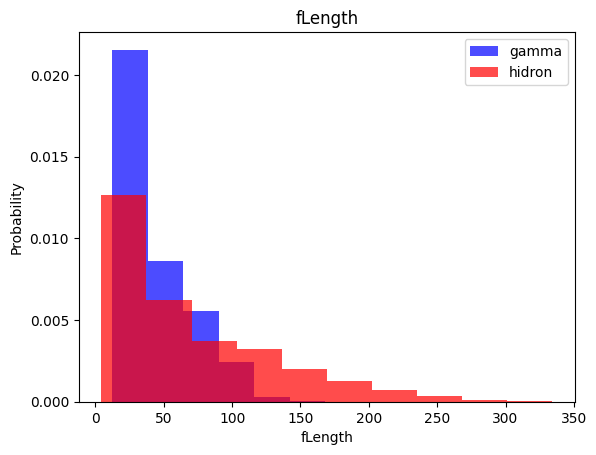

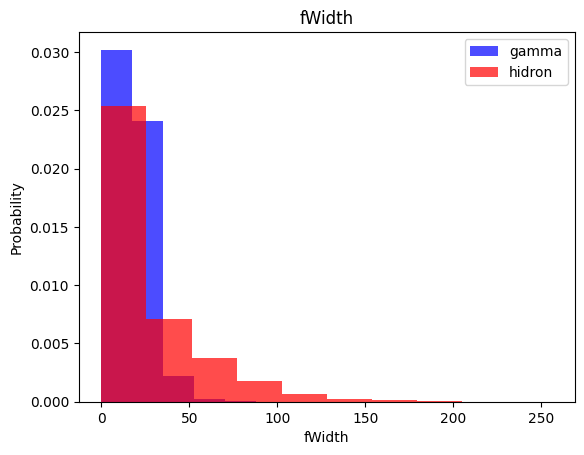

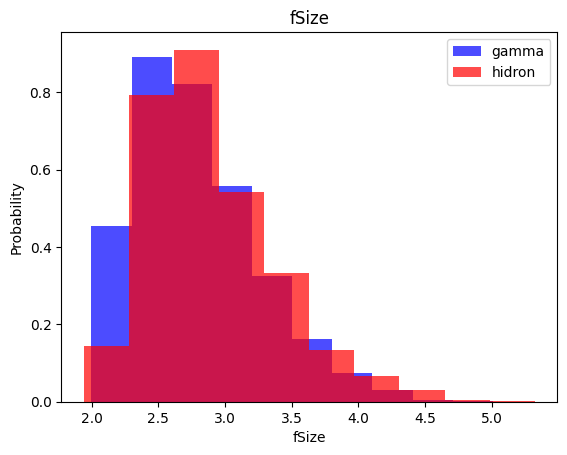

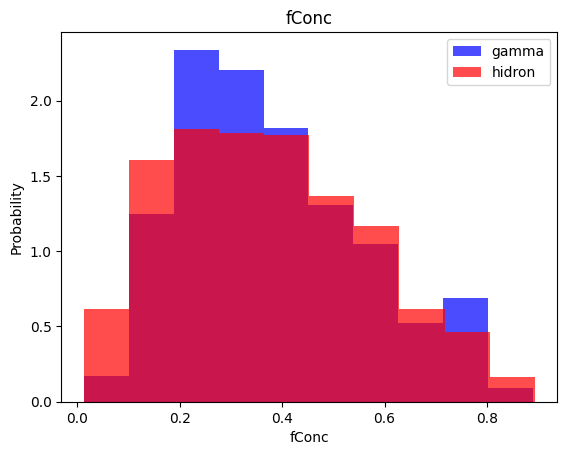

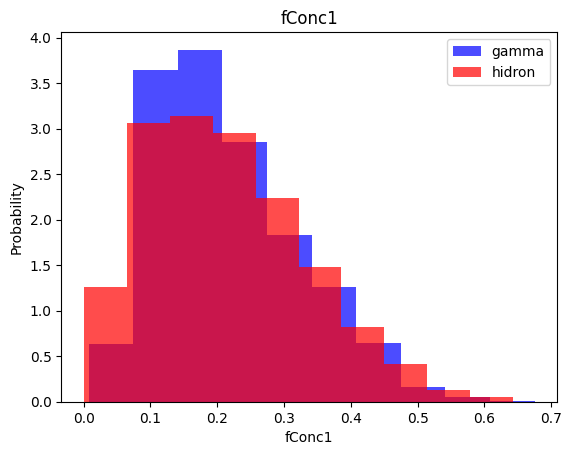

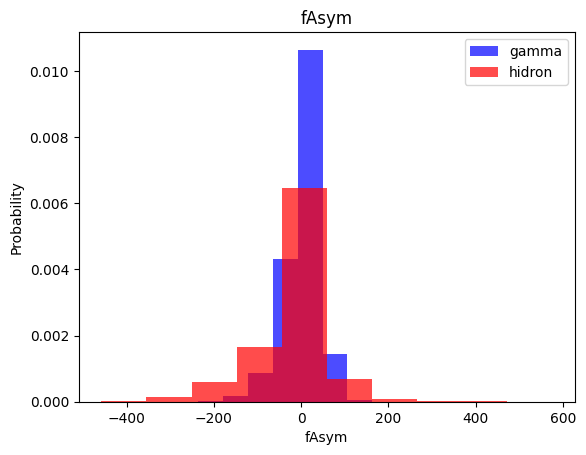

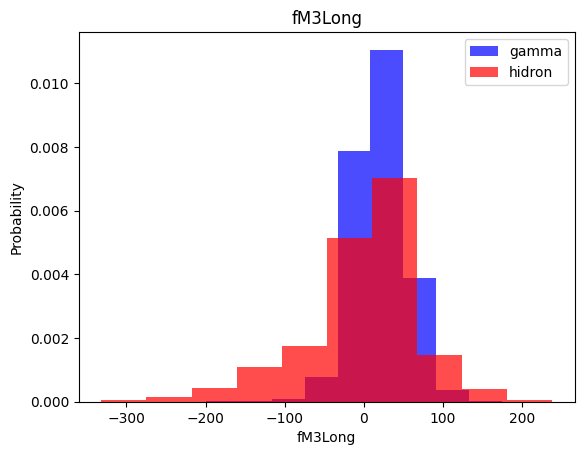

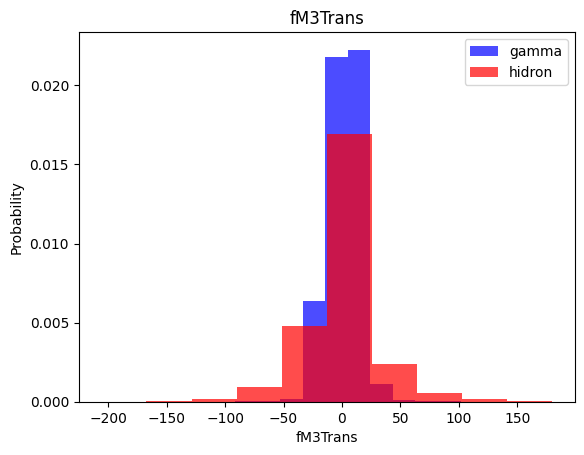

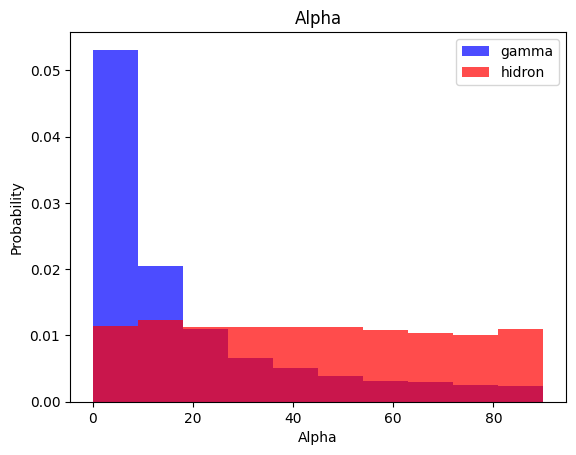

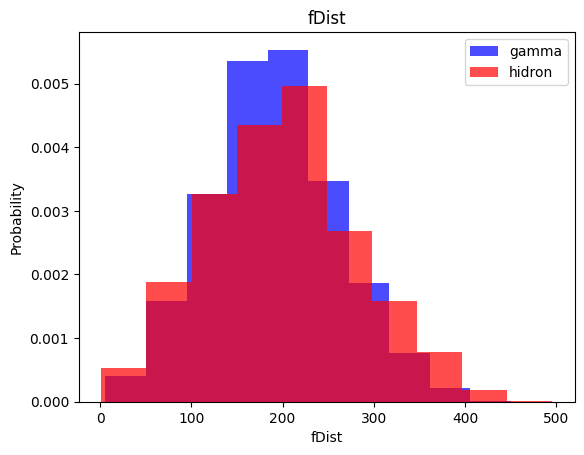

In [49]:
# Convert Class to integer & Visualize Data With matplot

for label in cols[:-1]:
  plt.hist(df[df["Class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["Class"]==0][label],color="red",label="hidron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [91]:
# Split Data to Train,Valid & Test
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [78]:
print(len(train[train["Class"]==1]))

7432


In [79]:
print(len(train[train["Class"]==0]))

3980


In [92]:
# Divide Data To X and Y
def divide (dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [93]:
# Final Preparation To Data
train,x_train,y_train = divide(train,True)
valid,x_valid,y_valid = divide(valid,False)
test,x_test,y_test = divide(test,False)

In [95]:
sum(y_train==0)

7399

In [96]:
sum(y_train==1)

7399

In [99]:
# Implement K-NN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1362
           1       0.85      0.85      0.85      2442

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

